# Understanding and using PCA and SVD with R code snippets

## Purpose

A short introduction and code(in R) for SVD, PCA and dimension reduction.

## Singular Value Decomposition

A $n \times p$ matrix $X$ is decomposed into $U\Sigma V^{T}$ where

- $n \times n$ orthogonal matrix $U$'s columns are eigenvectors of $XX^{T}$. (matrix $A$ is orthogonal if $AA^{T} = I$)
- $p \times p$ orthogonal matrix $V^{T}$'s columns are eigenvectors of $X^{T}X$
- $n \times p$ diagonal matrix. The elemnts are the square roots of the eigenvalues in decreasing order.

## Principal Component Analysis

By choosing top few eigenvalues, we can possibly restrict the number of dimensions of the data(originally $p$) to a smaller number. Deciding the number of dimensions will be dealt later.

Suppose, we decide to choose $k$ dimensions out of $p$.

- The 'scores' from the first $k$ principal components result from multiplying the first $k$ columns of $U$ with the $k \times k$  upper-left submatrix of $\Sigma$.

- The 'loadings' $k$th principal component is the $k$ the row of $V^{T}$.

The terms 'scores' and 'loadings' are explained in the next section.

## Hueristic and PCA as a optimization problem

> PCA tries to find a low dimensional representation of the data with as much as possible variation

Let $X_1,X_2, \dots X_p$ be the columns of $X$. We choose a linear combination of these columns,

$$Z_1 = \phi_{11}X_1 + \dots + \phi_{p1}X_p$$ such that the variance is maximized and $\sum_{j = 1}^{p}\phi_{j1} = 1$.


Lets make the notion of 'variance is maximized' precise. The $i$th element of $Z_1$ vector takes the form:

$$Z_{i1} = \phi_{11}X_{i1} + \dots + \phi_{p1}X_{ip}$$  

Optimization problem takes the form,

$$\text{minimize}_{\phi_{11}, \dots , \phi_{p1}} \left( \frac{1}{n} \sum_{1}^{n} \left( \sum_{j = 1}^{p} \phi_{j1}X_{ij} \right) ^2 \right)$$

subject to $$\sum_{j = 1}^{p}\phi_{j1} = 1$$

- The vector $\phi_p = (\phi_{11}, \dots, \phi_{p1})^{T}$ are called 'loadings' of the first first principal component.
- The vector $(Z_{11}, \dots, Z_{n1})^{T}$ are called 'scores' of the first first principal component.


For the loadings of the further principal components say the $l$th, we add the additinal constraint that loading vector should be orthogonal to all the previous loadings that is $\phi_{i} \cdot \phi_{l} = 0 \, \forall \, 1 \le i < l$ 

In [2]:
# basic principal compoment analysis in R
# In order to keep all columns on the same level, we normalize every column.

head(iris)
pca_iris <- prcomp(iris[, 1:4], scale = TRUE)
pca_iris
summary(pca_iris)
str(pca_iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Standard deviations:
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation:
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

List of 5
 $ sdev    : num [1:4] 1.708 0.956 0.383 0.144
 $ rotation: num [1:4, 1:4] 0.521 -0.269 0.58 0.565 -0.377 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 $ center  : Named num [1:4] 5.84 3.06 3.76 1.2
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ scale   : Named num [1:4] 0.828 0.436 1.765 0.762
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ x       : num [1:150, 1:4] -2.26 -2.07 -2.36 -2.29 -2.38 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 - attr(*, "class")= chr "prcomp"


In [3]:
# The loadings may be found in rotations matrix
# min(n, p) PCA components are chosen by the 'prcomp' function
pca_iris$rotation

,PC1,PC2,PC3,PC4
Sepal.Length,0.5210659,-0.37741762,0.7195664,0.2612863
Sepal.Width,-0.2693474,-0.92329566,-0.2443818,-0.1235096
Petal.Length,0.5804131,-0.02449161,-0.1421264,-0.8014492
Petal.Width,0.5648565,-0.06694199,-0.6342727,0.5235971


In [4]:
# The scores may be found in 'x'
head(pca_iris$x)
cat("dimensions:")
dim(pca_iris$x)

PC1,PC2,PC3,PC4
-2.257141,-0.4784238,0.12727962,0.024087508
-2.074013,0.6718827,0.23382552,0.102662845
-2.356335,0.3407664,-0.04405390,0.028282305
-2.291707,0.5953999,-0.09098530,-0.065735340
-2.381863,-0.6446757,-0.01568565,-0.035802870
-2.068701,-1.4842053,-0.02687825,0.006586116


dimensions:

[1] 150   4

In [5]:
# lets find PCA via SVD
svd_iris <- svd(scale(iris[, 1:4]))
str(svd_iris)

List of 3
 $ d: num [1:4] 20.85 11.67 4.68 1.76
 $ u: num [1:150, 1:4] -0.1082 -0.0995 -0.113 -0.1099 -0.1142 ...
 $ v: num [1:4, 1:4] 0.521 -0.269 0.58 0.565 -0.377 ...


In [6]:
# compute the first four principal component via svd
# and observe if they match
head(with(svd_iris, u %*% diag(d)))

-2.257141,-0.4784238,0.12727962,0.024087508
-2.074013,0.6718827,0.23382552,0.102662845
-2.356335,0.3407664,-0.04405390,0.028282305
-2.291707,0.5953999,-0.09098530,-0.065735340
-2.381863,-0.6446757,-0.01568565,-0.035802870
-2.068701,-1.4842053,-0.02687825,0.006586116


variance explained by each principal component:

[1] 1.7083611 0.9560494 0.3830886 0.1439265

cumulative variance summing to 100:

[1]  53.53  83.49  95.49 100.00

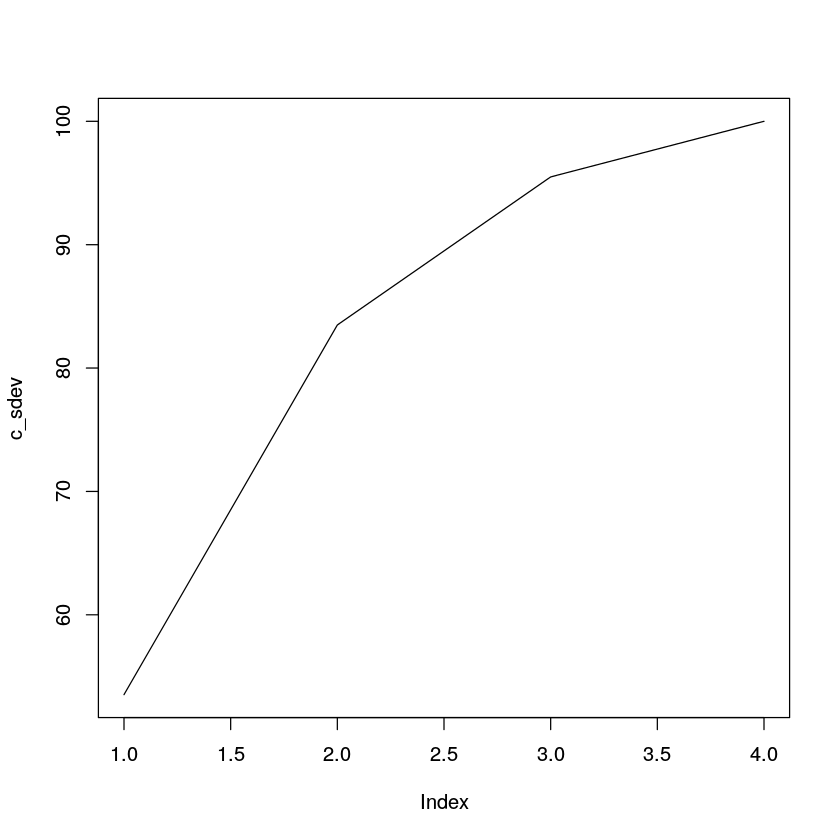

In [7]:
# proportion of variance
cat("variance explained by each principal component:")
pca_iris$sdev

cat("cumulative variance summing to 100:")
c_sdev <- cumsum(round(pca_iris$sdev/sum(pca_iris$sdev) * 100, 2))
c_sdev

# using variance to decide the number of principal components
plot(c_sdev, type = "l")

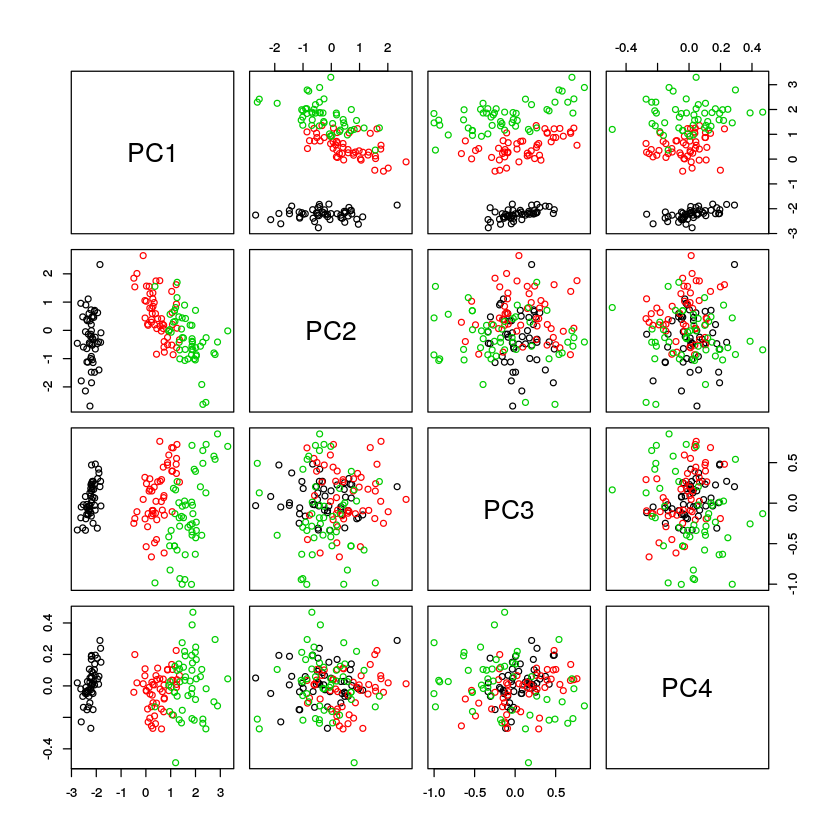

In [8]:
# observing that first two principal components explain around 83% of variance
# PCA throws some light on the classification
pairs(pca_iris$x, col = iris$Species)

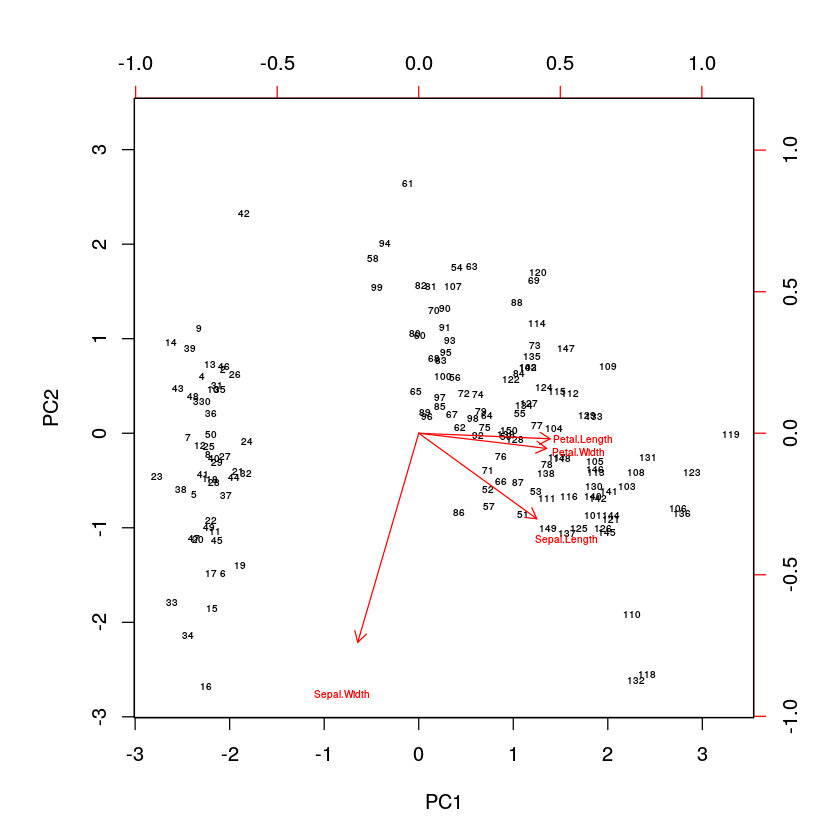

In [14]:
# biplot for a visual understanding of PCA
biplot(pca_iris, scale = 0, cex = 0.5)

## More on SVD

### Truncated SVD

When the latent information in the data is 'smaller' compared to $p$, the non-zero diagonal entries of $\Sigma$ are small in number say $r$. We keep leftmost $r$ columns of $U$, only non-zero  or 'large' enough diagonal elements of $\Sigma$ and topmost $r$ rows of $V^{T}$.

### LSI

One prominent usage of SVD(truncated) is in Latent Sematic indexing: Consider a $n times p$ matrix where $(i, j)$th element is typically the number of times a term $i$ appearing in document $j$. The latent information of different type of documents is typically much smaller than $p$. Truncated SVD yields a low dimensional representation, this classifying documents.

## R packages for a deeper dive

- `pcamethods`: Provides Bayesian PCA, Probabilistic PCA, Nipals PCA, Inverse Non-Linear PCA and the conventional SVD PCA, missing value imputation etc
- `irlba`: Fast Truncated SVD, PCA and Symmetric Eigendecomposition for Large Dense and Sparse Matrices
- `bigpca`: PCA, Transpose and Multicore Functionality for 'big.matrix' Objects